# Simulation of AuNP Deposition Process

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pame.simparser import LayerSimParser #Interface for handling simulation results
from skspec import *
from skspec.plotting import splot
from skspec.data import aunps_glass

['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


## Parameters for PAME

We simulate the reflection of the fiber covered by AuNPs thru Silanes, so in the simulation, the Stack comprises four layers - Fiber, Silanes, AuNPs, Water:

AuNP model:  **Lemarchand_11.7nm.yaml**;  AuNP diameter: **22nm**; 

Silanes RI based on Sellmeier model:

$$n(\lambda)=\sqrt{1+\frac{A_1\lambda^2}{\lambda^2-B_1^2}+\frac{A_2\lambda^2}{\lambda^2-B_2^2}+\frac{A_3\lambda^2}{\lambda^2-B_3^2}}  $$

**Simulation test1**: 

Vfrac: **0-0.133, 15 steps**, corresponding disk coverage: **0 - 25.40%**;

sellmeier coefficients: **A1=6.0, A2=3.2, A3=0.89, B1=1.3, B2=0.0, B3=50.0**

**Simulation test2**:

Vfrac: **0-0.128, 15 steps**, corresponding disk coverage: **0 - 24.45%**;

sellmeier coefficients: **A1=6.9, A2=3.2, A3=0.89, B1=1.6, B2=0.0, B3=50.0**
    

## Import Simulation Results

In [3]:
s1=LayerSimParser.load_pickle('../Simulations/SAM_test1.mpickle')
s2=LayerSimParser.load_pickle('../Simulations/SAM_test2.mpickle')
#print s1.summary()
#print s2.summary()

In [4]:
s1.promote('selected_layer.material.mie_full.extinction', alias='ext_cross')
s2.promote('selected_layer.material.mie_full.extinction', alias='ext_cross')

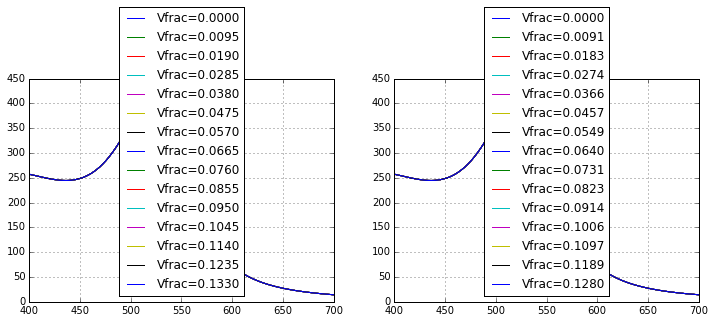

In [5]:
ax1, ax2 = splot(1,2, figsize=(12,4))
s1.primary_panel(minor_axis='selected_material.Vfrac',prefix='Vfrac=')['ext_cross'].plot(ax=ax1)
s2.primary_panel(minor_axis='selected_material.Vfrac',prefix='Vfrac=')['ext_cross'].plot(ax=ax2)
#plt.ylabel('$\sigma$')

/Users/zhaowenliu/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


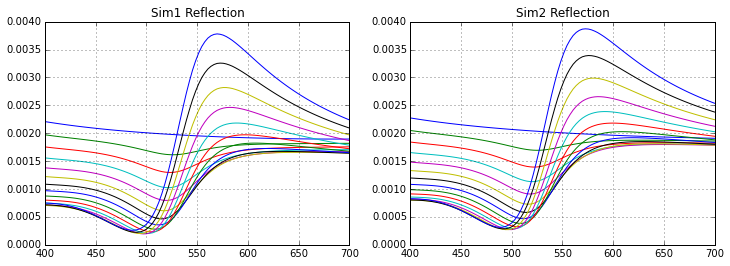

In [6]:
ax1, ax2 = splot(1,2, figsize=(12,4))

ref1=s1.primary_panel()['R_avg']
ref1.plot(ax=ax1,title='Sim1 Reflection',legend=False)

ref2=s2.primary_panel()['R_avg']
ref2.plot(ax=ax2,title='Sim2 Reflection',legend=False)

## Compare Simulation Results with Experimental Resutls

In [7]:
ts = aunps_glass(style=1).ix[:,::3]

spec1 = Spectra(ref1.values, index=ref1.index, columns=s1.inputs['selected_material.Vfrac'], specunit='nm').nearby[430:680]
spec1.reference=0
spec2 = Spectra(ref2.values, index=ref2.index, columns=s2.inputs['selected_material.Vfrac'], specunit='nm').nearby[430:680]
spec2.reference=0

In [8]:
spec1.iloc[0:5,:]

,0.0,0.0095,0.019,0.0285,0.038,0.0475,0.057,0.0665,0.076,0.0855,0.095,0.1045,0.114,0.1235,0.133
430.303030,(0.00212941057021+0j),(0.00190330064594+0j),(0.00169509141236+0j),(0.00150500524015+0j),(0.00133325908684+0j),(0.00118006415954+0j),(0.00104562558891+0j),(0.000930142114342+0j),(0.000833805780478+0j),(0.000756801645172+0j),(0.000699307498895+0j),(0.000661493595724+0j),(0.000643522395947+0j),(0.00064554832039+0j),(0.000667717516525+0j)
433.333333,(0.00212258034973+0j),(0.00189683743876+0j),(0.0016888270544+0j),(0.00149876914759+0j),(0.00132687831219+0j),(0.00117336344916+0j),(0.00103842744183+0j),(0.000922266842432+0j),(0.000825071570091+0j),(0.000747024620118+0j),(0.000688301784894+0j),(0.00064907138631+0j),(0.000629494019871+0j),(0.000629722310535+0j),(0.000649900680371+0j)
436.363636,(0.00211591634222+0j),(0.00189035159308+0j),(0.00168236587571+0j),(0.00149217642446+0j),(0.00131999515754+0j),(0.00116602834229+0j),(0.00103047627175+0j),(0.000913532952481+0j),(0.00081538580388+0j),(0.000736215368942+0j),(0.000676195036641+0j),(0.000635490775956+0j),(0.000614260881643+0j),(0.000612655731823+0j),(0.000630817557458+0j)
439.393939,(0.0021094137179+0j),(0.001883801621+0j),(0.00167563236314+0j),(0.00148512009683+0j),(0.00131247368145+0j),(0.00115789634948+0j),(0.00102158538413+0j),(0.000903731808437+0j),(0.000804520085818+0j),(0.00072412783238+0j),(0.000662725540871+0j),(0.000620476316458+0j),(0.000597535624388+0j),(0.000594051049596+0j),(0.000610162068348+0j)
442.424242,(0.00210306784425+0j),(0.00187703150483+0j),(0.00166833537826+0j),(0.00147719018355+0j),(0.00130380133878+0j),(0.0011483686276+0j),(0.00101108587727+0j),(0.000892140648477+0j),(0.0007917139368+0j),(0.00070997988614+0j),(0.00064710551408+0j),(0.000603250449306+0j),(0.000578566681154+0j),(0.00057319832136+0j),(0.000587281378084+0j)


/Users/zhaowenliu/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/transforms.py:979: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


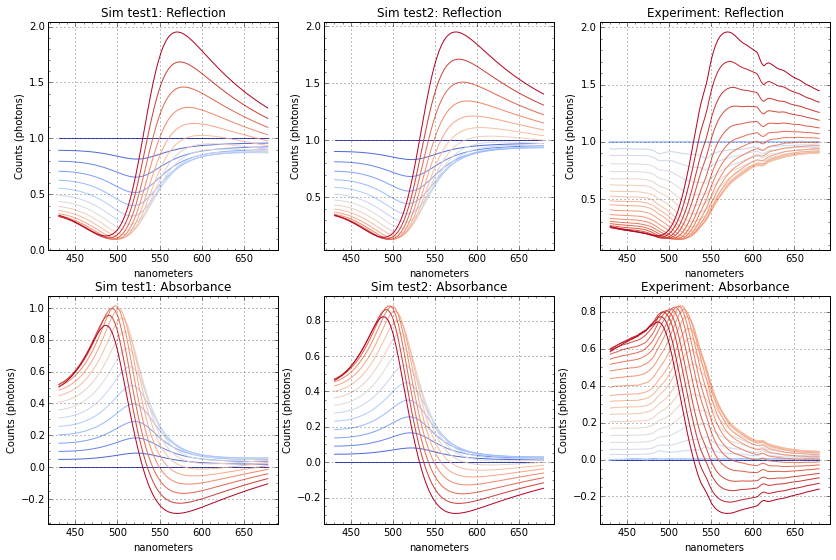

In [9]:
ax1, ax2, ax3, ax4, ax5, ax6 = splot(2,3, figsize=(14,9))
spec1.plot(ax=ax1,norm='r',title='Sim test1: Reflection')
spec2.plot(ax=ax2,norm='r',title='Sim test2: Reflection')
ts.plot(ax=ax3,norm='r',title='Experiment: Reflection')
spec1.plot(ax=ax4,norm='a',title='Sim test1: Absorbance')
spec2.plot(ax=ax5,norm='a',title='Sim test2: Absorbance')
ts.plot(ax=ax6,norm='a',title='Experiment: Absorbance')

The above figure shows that the simulated spectra shares the same trend with the experimental result. This suggests the Sellmeier model work for simulating the Silanes layer between fiber and AuNPs. We will tune the parameters to fit them better.

## ValueEditor: sim results viewer

In [10]:
from traits.api import HasTraits, Enum, Any, List, Str, Instance
from traitsui.api import View, Item
from traitsui.api import ValueEditor, TreeEditor


class A(HasTraits):
    x = Any
    options = Enum(['hide_floats', 'pivot'])
    
    traits_view = View(
        Item('x', editor=ValueEditor()),
        Item('options', style='custom'),
        title     = 'Selection',
        width     = 800,
        height    = 600,
        resizable = True,
             )
            

a = A(x=s1.results)
a.configure_traits()

True